In [1]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\91903\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\91903\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\91903\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\91903\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\91903\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [2]:
import re
w = []
with open('final.txt', 'r', encoding="utf8") as f:
    file_name_data = f.read()
    file_name_data = file_name_data.lower()
    w = re.findall('\w+', file_name_data)
main_set = set(w)

In [3]:
def counting_words(words):
	word_count = {}
	for word in words:
		if word in word_count:
			word_count[word] += 1
		else:
			word_count[word] = 1
	return word_count


In [4]:
def probab_cal(word_count_dict):
    probs = {}
    m = sum(word_count_dict.values())
    for key in word_count_dict.keys():
        probs[key] = word_count_dict[key] / m
    return probs

In [5]:
import pattern
from pattern.en import lemma, lexeme
from nltk.stem import WordNetLemmatizer
 
def LemmWord(word):
    return list(lexeme(wd) for wd in word.split())[0]

In [6]:
def DeleteLetter(word):
    delete_list = []
    split_list = []
    for i in range(len(word)):
        split_list.append((word[0:i], word[i:]))
    for a, b in split_list:
        delete_list.append(a + b[1:])
    return delete_list

In [7]:
def Switch_(word):
    split_list = []
    switch_l = []
    for i in range(len(word)):
        split_list.append((word[0:i], word[i:]))

    switch_l = [a + b[1] + b[0] + b[2:] for a, b in split_list if len(b) >= 2]
    return switch_l

In [8]:
def Replace_(word):
    split_l = []
    replace_list = []
 
    for i in range(len(word)):
        split_l.append((word[0:i], word[i:]))
    alphs = 'abcdefghijklmnopqrstuvwxyz'
    replace_list = [a + l + (b[1:] if len(b) > 1 else '')
                    for a, b in split_l if b for l in alphs]
    return replace_list

In [9]:
def insert_(word):
    split_l = []
    insert_list = []

    for i in range(len(word) + 1):
        split_l.append((word[0:i], word[i:]))

    alphs = 'abcdefghijklmnopqrstuvwxyz'
    insert_list = [a + l + b for a, b in split_l for l in alphs]
    return insert_list

In [10]:
def colab_1(word, allow_switches=True):
    colab_1 = set()
    colab_1.update(DeleteLetter(word))
    if allow_switches:
        colab_1.update(Switch_(word))
    colab_1.update(Replace_(word))
    colab_1.update(insert_(word))
    return colab_1

def colab_2(word, allow_switches=True):
    colab_2 = set()
    edit_one = colab_1(word, allow_switches=allow_switches)
    for w in edit_one:
        if w:
            edit_two = colab_1(w, allow_switches=allow_switches)
            colab_2.update(edit_two)
    return colab_2

In [11]:
def get_corrections(word, probs, vocab, n=2):
    suggested_word = []
    best_suggestion = []
    suggested_word = list(
        (word in vocab and word) or colab_1(word).intersection(vocab)
        or colab_2(word).intersection(
            vocab))

    best_suggestion = [[s, probs[s]] for s in list(reversed(suggested_word))]
    return best_suggestion

Enter any word:  whatevs


Do you mean: wharves
Do you mean: whatever
Do you mean: waters


C:\Users\91903\AppData\Local\Temp\ipykernel_21352\1800752865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probabilities, y=words, palette="viridis")


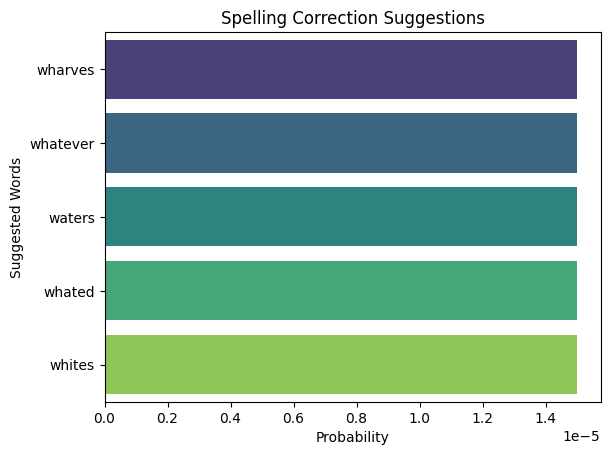

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_corrections(corrections):
    words, probabilities = zip(*corrections)
    sns.barplot(x=probabilities, y=words, palette="viridis")
    plt.xlabel('Probability')
    plt.ylabel('Suggested Words')
    plt.title('Spelling Correction Suggestions')
    plt.show()

my_word = input("Enter any word: ")
word_count = counting_words(main_set)
probs = probab_cal(word_count)
corrections = get_corrections(my_word, probs, main_set, 2)

if corrections:
    for i, word_prob in enumerate(corrections):
        if i < 3:
            print("Do you mean:", word_prob[0])
        else:
            break
    visualize_corrections(corrections)
else:
    print("No suggestions found.")


Enter any word:  whatevs


Do you mean: wharves
Do you mean: whatever
Do you mean: waters


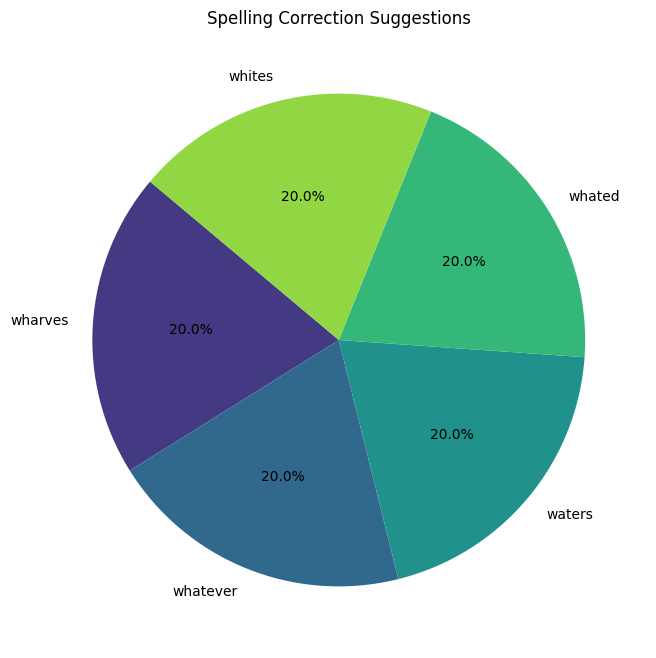

In [34]:
import matplotlib.pyplot as plt

# Visualization function
def visualize_pie_chart(corrections):
    words, probabilities = zip(*corrections)
    plt.figure(figsize=(8, 8))
    plt.pie(probabilities, labels=words, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(words)))
    plt.title('Spelling Correction Suggestions')
    plt.show()

# Main process
my_word = input("Enter any word: ")
word_count = counting_words(main_set)
probs = probab_cal(word_count)
corrections = get_corrections(my_word, probs, main_set, 2)

if corrections:
    for i, word_prob in enumerate(corrections):
        if i < 3:
            print("Do you mean:", word_prob[0])
        else:
            break
    visualize_pie_chart(corrections)
else:
    print("No suggestions found.")
